# Experiments on a modified moonlight sonata (mov3)

In [1]:
import csv
import dynamicComputation as dc
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as inter

In [2]:
with open('data/sonataCP/Loudness_Changepoints_beats.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    beats = [float(t) for t,*_ in csv_reader]
interpolate_target = beats

## Piecewise constant

In [3]:
with open('data/sonataCP/Loudness_Changepoints_loudness.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    smooth_loudness = [(float(line[0]),float(line[3])) for line in csv_reader]

In [4]:
with open('data/sonataCP/Loudness_Changepoints_velocity.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    velocities = [(float(t), int(v)) for t,v in csv_reader]
t_scaling =  101.887/ velocities[-1][0]
velocities = [(t*t_scaling,v) for t,v in velocities]

<ipython-input-5-19a6aedf7b6f>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


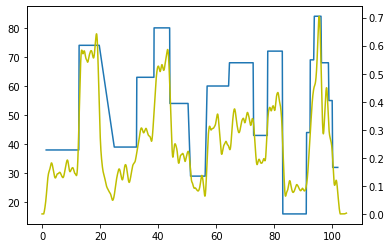

In [5]:
t_v, v_v = zip(*velocities)
fig, ax1 = plt.subplots()
ax1.plot(t_v, v_v)
ax2 = ax1.twinx()
ax2.plot(*zip(*smooth_loudness), 'y')
fig.show()

In [6]:
spline = inter.UnivariateSpline(*zip(*smooth_loudness), s=0)
loudness = spline(interpolate_target)

<ipython-input-7-6f889fc5db39>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


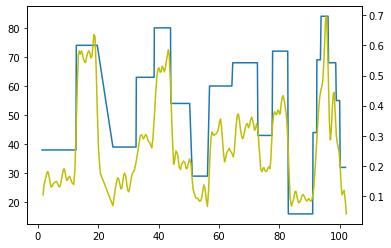

In [7]:
t_v, v_v = zip(*velocities)
fig, ax1 = plt.subplots()
ax1.plot(t_v, v_v)
ax2 = ax1.twinx()
ax2.plot(interpolate_target, loudness, 'y')
fig.show()

In [8]:
import lengthPriors
length_prior = lengthPriors.EmpiricalLengthPrior(list(range(1,20)), dataLength=len(loudness), maxLength=20)

In [9]:
arcPriorLoud = {
    # Gaussian priors on the parameters of ax^2 + bx + c
    'aMean': 0,
    'aStd': 00,
    'bMean': 00,
    'bStd': 00,
    'cMean': 0.41,
    'cStd': 0.4,
    'noiseStd': 0.1
}

In [10]:
posteriors = dc.runAlphaBeta(loudness, arcPriorLoud, length_prior)

<ipython-input-11-67717fde841c>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


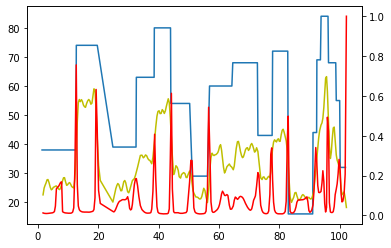

In [11]:
t_v, v_v = zip(*velocities)
fig, ax1 = plt.subplots()
ax1.plot(t_v, v_v)
ax2 = ax1.twinx()
ax2.plot(interpolate_target, loudness, 'y')
ax2.plot(interpolate_target, posteriors, 'r')
fig.show()

## Piecewise constant (no velocity changes)

In [12]:
with open('data/sonataCP/Loudness_Changepoints_flat_loudness.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    smooth_loudness_flat = [(float(line[0]),float(line[3])) for line in csv_reader]

In [13]:
spline = inter.UnivariateSpline(*zip(*smooth_loudness_flat), s=0)
loudness_flat = spline(interpolate_target)

In [14]:
arcPriorLoud_flat = {
    # Gaussian priors on the parameters of ax^2 + bx + c
    'aMean': 0,
    'aStd': 00,
    'bMean': 00,
    'bStd': 00,
    'cMean': 0.41,
    'cStd': 0.4,
    'noiseStd': 0.1
}

In [15]:
posteriors_flat = dc.runAlphaBeta(loudness_flat, arcPriorLoud_flat, length_prior)

<ipython-input-16-d8ec037c0f05>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


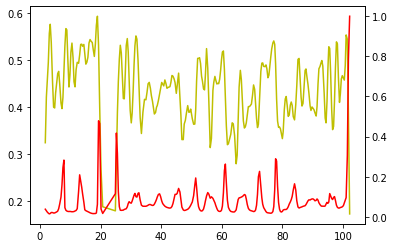

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(interpolate_target, loudness_flat, 'y')
ax2 = ax1.twinx()
ax2.plot(interpolate_target, posteriors_flat, 'r')
fig.show()

## Piecewise linear

In [17]:
with open('data/sonataCP/Loudness_Changepoints_slopes_loudness.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    smooth_loudness_flat = [(float(line[0]),float(line[3])) for line in csv_reader]

In [18]:
with open('data/sonataCP/Loudness_Changepoints_slopes_velocity.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    velocities = [(float(t), int(v)) for t,v in csv_reader]
t_scaling =  101.887/ velocities[-1][0]
velocities = [(t*t_scaling,v) for t,v in velocities]

In [19]:
spline = inter.UnivariateSpline(*zip(*smooth_loudness_flat), s=0)
loudness_flat = spline(interpolate_target)

In [20]:
arcPriorLoud_flat = {
    # Gaussian priors on the parameters of ax^2 + bx + c
    'aMean': 0,
    'aStd': 00,
    'bMean': 00,
    'bStd': .8,
    'cMean': 0.41,
    'cStd': 0.4,
    'noiseStd': 0.2
}

In [21]:
import lengthPriors
length_prior = lengthPriors.EmpiricalLengthPrior([*range(1,21), *range(5,16), *range(8,13)], dataLength=len(loudness_flat), maxLength=20)

In [22]:
posteriors_flat = dc.runAlphaBeta(loudness_flat, arcPriorLoud_flat, length_prior)

<ipython-input-23-14396d5d72b7>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


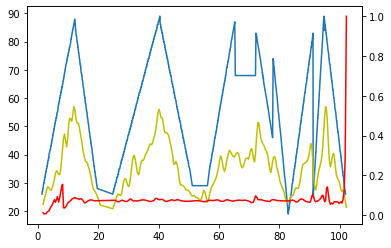

In [23]:
fig, ax1 = plt.subplots()
ax1.plot(*zip(*velocities))
ax2 = ax1.twinx()
ax2.plot(interpolate_target, loudness_flat, 'y')
ax2.plot(interpolate_target, posteriors_flat, 'r')
fig.show()